In [1]:
import os
import numpy as np
import tensorflow as tf
import pickle as pkl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [5]:
class tf_bao():

    # Initialization routine
    def __init__(self, model_name):

        # Load CONNECT model
        model = tf.keras.models.load_model(model_name, compile=False)
        self.output_info = model.info_dict

        # Set path to datafile (Hardcoded paths would be avoided for general implementation)
        self.data_directory = '/home/lucajn/connect/resources/montepython_public/data'
        self.file = 'bao_2012.txt'

        # Define emulated data
        self.tt_idx = self.output_info['interval']['Cl']['tt']
        self.ee_idx = self.output_info['interval']['Cl']['ee']
        self.te_idx = self.output_info['interval']['Cl']['te']
        self.pk_idx = self.output_info['interval']['Pk']['pk']['0.0']
        self.pk_1dot5_idx = self.output_info['interval']['Pk']['pk']['1.5']
        self.pk_13dot65_idx = self.output_info['interval']['Pk']['pk']['13.65']
        self.pk_cb_idx = self.output_info['interval']['Pk']['pk_cb']['0.0']

    @tf.function
    def Cl_tt(self, output_from_emulator):

        # Define output & Cl
        output = output_from_emulator

        return output[0, self.tt_idx[0]:self.tt_idx[1]]

    @tf.function
    def Cl_ee(self, output_from_emulator):

        # Define output & Cl
        output = output_from_emulator

        return output[0, self.ee_idx[0]:self.ee_idx[1]]

    @tf.function
    def Cl_te(self, output_from_emulator):

        # Define output & Cl
        output = output_from_emulator

        return output[0, self.te_idx[0]:self.te_idx[1]]

    @tf.function
    def Pk_z0(self, output_from_emulator):

        # Define output & Cl
        output = output_from_emulator

        return output[0, self.pk_idx[0]:self.pk_idx[1]]

    @tf.function
    def Pk_z1dot5(self, output_from_emulator):

        # Define output & Cl
        output = output_from_emulator

        return output[0, self.pk_1dot5_idx[0]:self.pk_1dot5_idx[1]]

    @tf.function
    def Pk_z13dot65(self, output_from_emulator):

        # Define output & Cl
        output = output_from_emulator

        return output[0, self.pk_13dot65_idx[0]:self.pk_13dot65_idx[1]]

    @tf.function
    def Pk_cb_z0(self, output_from_emulator):

        # Define output & Cl
        output = output_from_emulator

        return output[0, self.pk_cb_idx[0]:self.pk_cb_idx[1]]

In [6]:
model_name = 'bao_8z_5'
model = tf.keras.models.load_model(model_name, compile=False)

with open(os.path.join(model_name, 'test_data.pkl'), 'rb') as f:
    test_data = pkl.load(f)

tf_bao1 = tf_bao(model_name)

In [54]:
n = 20

output = model(tf.constant([test_data[0][n]]))
test_output = tf.expand_dims(test_data[1][n], axis=0)

/tmp/ipykernel_13937/1953114280.py:44: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim([0, 2*10**5])


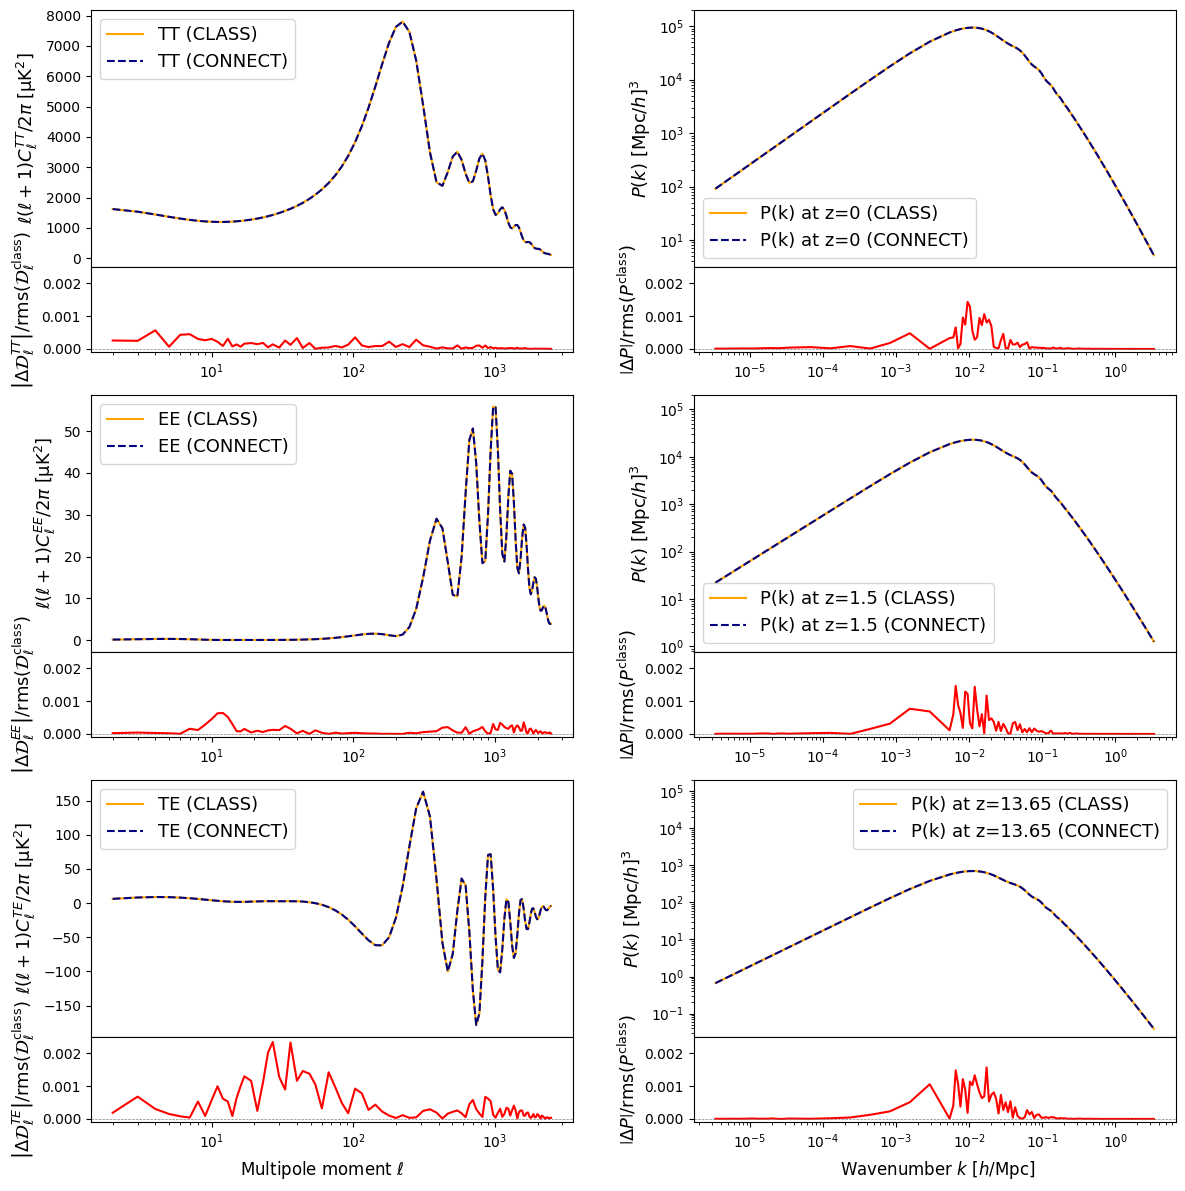

In [66]:
# Sample data loading
ell = tf_bao1.output_info['ell']

class_Cl_tt_uK2 = tf_bao1.Cl_tt(test_output) * 1e13
connect_Cl_tt_uK2 = tf_bao1.Cl_tt(output) * 1e13
diff_Cl_tt_uK2 = class_Cl_tt_uK2 - connect_Cl_tt_uK2

class_Cl_ee_uK2 = tf_bao1.Cl_ee(test_output) * 1e13
connect_Cl_ee_uK2 = tf_bao1.Cl_ee(output) * 1e13
diff_Cl_ee_uK2 = class_Cl_ee_uK2 - connect_Cl_ee_uK2

class_Cl_te_uK2 = tf_bao1.Cl_te(test_output) * 1e13
connect_Cl_te_uK2 = tf_bao1.Cl_te(output) * 1e13
diff_Cl_te_uK2 = class_Cl_te_uK2 - connect_Cl_te_uK2

k = tf_bao1.output_info['k_grid']
class_Pk = tf_bao1.Pk_z0(test_output)
connect_Pk = tf_bao1.Pk_z0(output)
diff_Pk = class_Pk - connect_Pk

# Additional P(k) data
class_Pk_z1dot5 = tf_bao1.Pk_z1dot5(test_output)
connect_Pk_z1dot5 = tf_bao1.Pk_z1dot5(output)
diff_Pk_z1dot5 = class_Pk_z1dot5 - connect_Pk_z1dot5

class_Pk_z13dot65 = tf_bao1.Pk_z13dot65(test_output)
connect_Pk_z13dot65 = tf_bao1.Pk_z13dot65(output)
diff_Pk_z13dot65 = class_Pk_z13dot65 - connect_Pk_z13dot65

fig = plt.figure(figsize=(14, 20))

# Adjusting GridSpec for 2x3 layout
gs = gridspec.GridSpec(12, 2, height_ratios=[3, 1, 0.5, 3, 1, 0.5, 3, 1, 0.5, 3, 1, 0.5])

# Helper function to calculate root mean square
def rms(data):
    return np.sqrt(np.mean(data**2))

# Plotting function
def make_plot(ax, x, y1, y2, ydiff, label1, label2, ylabel1, ylabel2, xlabel, loglog=False, label_font_size=13):
    if loglog:
        ax[0].loglog(x, y1, label=label1, linestyle='-', color='orange')
        ax[0].loglog(x, y2, label=label2, linestyle='--', color='navy')
        ax[0].set_ylim([0, 2*10**5])
    else:
        ax[0].semilogx(x, y1, label=label1, linestyle='-', color='orange')
        ax[0].semilogx(x, y2, label=label2, linestyle='--', color='navy')
    ax[0].set_ylabel(ylabel1, fontsize=label_font_size)
    ax[0].legend(fontsize=label_font_size)
    ax[0].set_xticklabels([])
    normalized_diff = np.abs(ydiff) / rms(y1)
    ax[1].semilogx(x, normalized_diff, color='red')
    ax[1].axhline(0, color='gray', linestyle='--', linewidth=0.5)
    ax[1].set_ylabel(ylabel2, fontsize=label_font_size)
    ax[1].set_ylim([-0.0001, 0.0025])

# Creating plots using the function
# C_l plots
make_plot([plt.subplot(gs[0, 0]), plt.subplot(gs[1, 0])], ell, class_Cl_tt_uK2, connect_Cl_tt_uK2, diff_Cl_tt_uK2, 
          'TT (CLASS)', 'TT (CONNECT)', r"$\ell(\ell+1)C_\ell^{TT}/2\pi$ [µK$^2$]", r"$\left| \Delta \mathcal{D}^{TT}_\ell \right| / \mathrm{rms}(\mathcal{D}_\ell^{\mathrm{class}})$", "Multipole moment $\ell$")

make_plot([plt.subplot(gs[3, 0]), plt.subplot(gs[4, 0])], ell, class_Cl_ee_uK2, connect_Cl_ee_uK2, diff_Cl_ee_uK2, 
          'EE (CLASS)', 'EE (CONNECT)', r"$\ell(\ell+1)C_\ell^{EE}/2\pi$ [µK$^2$]", r"$\left| \Delta \mathcal{D}^{EE}_\ell \right| / \mathrm{rms}(\mathcal{D}_\ell^{\mathrm{class}})$", "Multipole moment $\ell$")

make_plot([plt.subplot(gs[6, 0]), plt.subplot(gs[7, 0])], ell, class_Cl_te_uK2, connect_Cl_te_uK2, diff_Cl_te_uK2, 
          'TE (CLASS)', 'TE (CONNECT)', r"$\ell(\ell+1)C_\ell^{TE}/2\pi$ [µK$^2$]", r"$\left| \Delta \mathcal{D}^{TE}_\ell \right| / \mathrm{rms}(\mathcal{D}_\ell^{\mathrm{class}})$", "Multipole moment $\ell$")

# P(k) plots
make_plot([plt.subplot(gs[0, 1]), plt.subplot(gs[1, 1])], k, class_Pk, connect_Pk, diff_Pk, 
          'P(k) at z=0 (CLASS)', 'P(k) at z=0 (CONNECT)', r"$P(k)$ [$\mathrm{Mpc}/h]^3$", r"$\left| \Delta P \right| / \mathrm{rms}(P^{\mathrm{class}})$", "Wavenumber $k$ [$h/\mathrm{Mpc}$]", loglog=True)

make_plot([plt.subplot(gs[3, 1]), plt.subplot(gs[4, 1])], k, class_Pk_z1dot5, connect_Pk_z1dot5, diff_Pk_z1dot5, 
          'P(k) at z=1.5 (CLASS)', 'P(k) at z=1.5 (CONNECT)', r"$P(k)$ [$\mathrm{Mpc}/h]^3$", r"$\left| \Delta P \right| / \mathrm{rms}(P^{\mathrm{class}})$", "Wavenumber $k$ [$h/\mathrm{Mpc}$]", loglog=True)

make_plot([plt.subplot(gs[6, 1]), plt.subplot(gs[7, 1])], k, class_Pk_z13dot65, connect_Pk_z13dot65, diff_Pk_z13dot65, 
          'P(k) at z=13.65 (CLASS)', 'P(k) at z=13.65 (CONNECT)', r"$P(k)$ [$\mathrm{Mpc}/h]^3$", r"$\left| \Delta P \right| / \mathrm{rms}(P^{\mathrm{class}})$", "Wavenumber $k$ [$h/\mathrm{Mpc}$]", loglog=True)

# Setting common x-labels for each column
plt.figtext(0.29, 0.3, 'Multipole moment $\ell$', ha='center', va='center', fontsize=12)
plt.figtext(0.73, 0.3, 'Wavenumber $k$ [$h/\mathrm{Mpc}$]', ha='center', va='center', fontsize=12)

# Adjust the layout and display
plt.subplots_adjust(hspace=0, wspace=0.25)
plt.savefig("network_output.pdf", format='pdf', bbox_inches='tight')
plt.show()